In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('../Style.mplstyle')
import matplotlib as mpl
import pandas as pd
import os
import sys
import scipy
import matplotlib.dates as mdates
from datetime import datetime
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
sys.path.append('..')
from read_data_functions import *
from plot_functions import *
from calculations import *

In [2]:
parent_path = '../../../../'
path_S1 = 'L:/PG-Nanoteknologi/PROJEKTER/2024 Laura og Nan/cph central and nørreport measurements/Station 1/'
path_S2 = 'L:/PG-Nanoteknologi/PROJEKTER/2024 Laura og Nan/cph central and nørreport measurements/Station 2/'

NS1 = read_SMPS(path_S1, parent_path, [-1, 0])
OPS1 = read_OPS(path_S1+'OPS/', parent_path, -1)
NS2 = read_SMPS(path_S2, parent_path, [-1, 0])
OPS2 = read_OPS(path_S2+'OPS/', parent_path, -1)

NS_dict_keys = ['2024-12-09_NanoScan', '2024-12-10_NanoScan', '2024-12-11_NanoScan', '2024-12-12_NanoScan', 
                '2024-12-13_NanoScan', '2024-12-16_NanoScan', '2024-12-17_NanoScan']
NS_bins = NS1['2024-12-06_NanoScan'].keys()[3:16].to_list()

OPS1_dict_keys = ['OPS1-CPH-d1', 'OPS1-CPH-d2', 'OPS1-CPH-d3', 'OPS1-CPH-d4', 'OPS1-CPH-d5', 'OPS1-NP-d1', 'OPS1-NP-d2'] # 'OPS1-CPH-n3', 'OPS1-CPH-n4'
OPS2_dict_keys = ['OPS2-CPH-d1', 'OPS2-CPH-d2', 'OPS2-CPH-d3', 'OPS2-CPH-d4', 'OPS2-CPH-d5', 'OPS2-NP-d1', 'OPS2-NP-d2']
OPS_cut_point = [0.300, 0.374, 0.465, 0.579, 0.721, 0.897, 1.117, 1.391, 1.732, 2.156, 2.685, 3.343, 4.162, 5.182, 6.451, 8.031, 10.000]
OPS_keys = OPS1['OPS1-HEPA'].keys()[1:17].to_list()

OPS1['OPS1-CPH-d5'] = pd.concat([OPS1['OPS1-CPH-d5-1'], OPS1['OPS1-CPH-d5-2']], ignore_index=True)
OPS1['OPS1-NP-d2'] = pd.concat([OPS1['OPS1-NP-d2-1'], OPS1['OPS1-NP-d2-2']], ignore_index=True)
OPS2['OPS2-CPH-d3'] = pd.concat([OPS2['OPS2-CPH-d3-1'], OPS2['OPS2-CPH-d3-2']], ignore_index=True)
OPS2['OPS2-CPH-d3'] = pd.concat([OPS2['OPS2-CPH-d3'], OPS2['OPS2-CPH-d3-3']], ignore_index=True)

NS1_bg_mean, NS1_bg_std, NS1_bg_error = bin_mean(['2024-12-06 11:05:00', '2024-12-06 11:45:00'], 
                                              NS1['2024-12-06_NanoScan'], NS_bins, 'Time', 0.1)
for key in NS_dict_keys:
    df = NS1[key]
    for i, bin in enumerate(NS_bins):
        df[bin] = df[bin] - NS1_bg_mean[i]
    NS1[key] = df

NS2_bg_mean, NS2_bg_std, NS2_bg_error = bin_mean(['2024-12-06 11:05:00', '2024-12-06 11:45:00'], 
                                              NS2['2024-12-06_NanoScan'], NS_bins, 'Time', 0.1)
for key in NS_dict_keys:
    df = NS2[key]
    for i, bin in enumerate(NS_bins):
        df[bin] = df[bin] - NS2_bg_mean[i]
    NS2[key] = df

OPS_mid_point = [0.337, 0.419, 0.522, 0.650, 0.809, 1.007, 1.254, 1.562, 1.944, 2.421, 3.014, 3.752, 4.672, 5.816, 7.241, 9.015]

for dict_key1, dict_key2 in zip(OPS1_dict_keys, OPS2_dict_keys):
    for old_key, new_key in zip(OPS_keys, OPS_mid_point):
        OPS1[dict_key1] = OPS1[dict_key1].rename(columns = {old_key: new_key})
        OPS2[dict_key2] = OPS2[dict_key2].rename(columns = {old_key: new_key})

NS_bin_mean = []
for key in NS_bins:
    NS_bin_mean.append(float(key) / 1000)

In [3]:
timestamps = [['2024-12-09 12:00:00', '2024-12-09 16:30:00'],
              ['2024-12-10 09:15:00', '2024-12-10 16:00:00'],
              ['2024-12-11 09:00:00', '2024-12-11 16:00:00'],
              ['2024-12-12 09:00:00', '2024-12-12 16:00:00'],
              ['2024-12-13 08:45:00', '2024-12-13 14:00:00'],
              ['2024-12-16 09:45:00', '2024-12-16 15:45:00'],
              ['2024-12-17 09:15:00', '2024-12-17 15:45:00']]

ax_labels = ['Particle diameter / $\mu$m', 'Number / #/cm$^{3}$', 'Mass / $\mu$g/m$^{3}$']

In [14]:
NS_OPS_number1, NS_OPS_mass1, NS_OPS_keys, NS_OPS_bin_mean = merge_data(NS1, NS_dict_keys, [3, 15], OPS1, OPS1_dict_keys, [1, 17], timestamps, ['Time', 'Time'], False, True)
NS_OPS_number2, NS_OPS_mass2, NS_OPS_keys, NS_OPS_bin_mean = merge_data(NS2, NS_dict_keys, [3, 15], OPS2, OPS2_dict_keys, [1, 17], timestamps, ['Time', 'Time'], False, True)

print(NS_OPS_keys[12:])
print(NS_OPS_mass1.keys())

[0.337, 0.419, 0.522, 0.65, 0.809, 1.007, 1.254, 1.562, 1.944, 2.421, 3.014, 3.752, 4.672, 5.816, 7.241, 9.015]
dict_keys(['Exp1', 'Exp2', 'Exp3', 'Exp4', 'Exp5', 'Exp6', 'Exp7'])


Day  1
Number (building):  19584.547729332073
Mass (building):  21.108342124312003
Mass (building) > 0.3:  12.36781853345569
Number (street):  17102.252254224488
Mass (street):  12.045780335898094
Mass (street) > 0.3:  7.8924515582402
Day  2
Number (building):  16782.894854218834
Mass (building):  23.147097816235263
Mass (building) > 0.3:  14.67689509656164
Number (street):  19140.045236676557
Mass (street):  21.0586003750985
Mass (street) > 0.3:  14.04806859020291


C:\Users\B363580\AppData\Local\Temp\ipykernel_22732\1426511920.py:34: UserWarning: The figure layout has changed to tight
  fig1.tight_layout()


Day  3
Number (building):  13553.75083734055
Mass (building):  30.007757690220494
Mass (building) > 0.3:  18.675493195364485
Number (street):  18445.37283613781
Mass (street):  31.040534941348703
Mass (street) > 0.3:  19.046110261378566


C:\Users\B363580\AppData\Local\Temp\ipykernel_22732\1426511920.py:34: UserWarning: The figure layout has changed to tight
  fig1.tight_layout()


Day  4
Number (building):  14780.036705372626
Mass (building):  29.11049545802219
Mass (building) > 0.3:  19.31022098696513
Number (platform):  24931.332790770775
Mass (platform):  26.03134799821481
Mass (platform) > 0.3:  10.351637154902292
Day  5
Number (building):  19391.475624118164
Mass (building):  30.223431741194
Mass (building) > 0.3:  8.972817711039793
Number (platform):  19762.251434587706
Mass (platform):  22.443013813392966
Mass (platform) > 0.3:  8.332655004804183


C:\Users\B363580\AppData\Local\Temp\ipykernel_22732\1426511920.py:61: UserWarning: The figure layout has changed to tight
  fig2.tight_layout()


Day  6
Number (Re/IC):  31488.411324318462
Mass (Re/IC):  46.79050011802364
Mass (Re/IC) > 0.3:  24.451513338723668
Number (S-train):  29756.27181705115
Mass (S-train):  53.97581856937003
Mass (S-train) > 0.3:  34.82935778735673
Day  7
Number (Re/IC):  26538.37585967794
Mass (Re/IC):  31.77985757575907
Mass (Re/IC) > 0.3:  16.03764242376845
Number (S-train):  26374.11087858767
Mass (S-train):  50.337013143722984
Mass (S-train) > 0.3:  34.731265577624825


C:\Users\B363580\AppData\Local\Temp\ipykernel_22732\1426511920.py:89: UserWarning: The figure layout has changed to tight
  fig3.tight_layout()


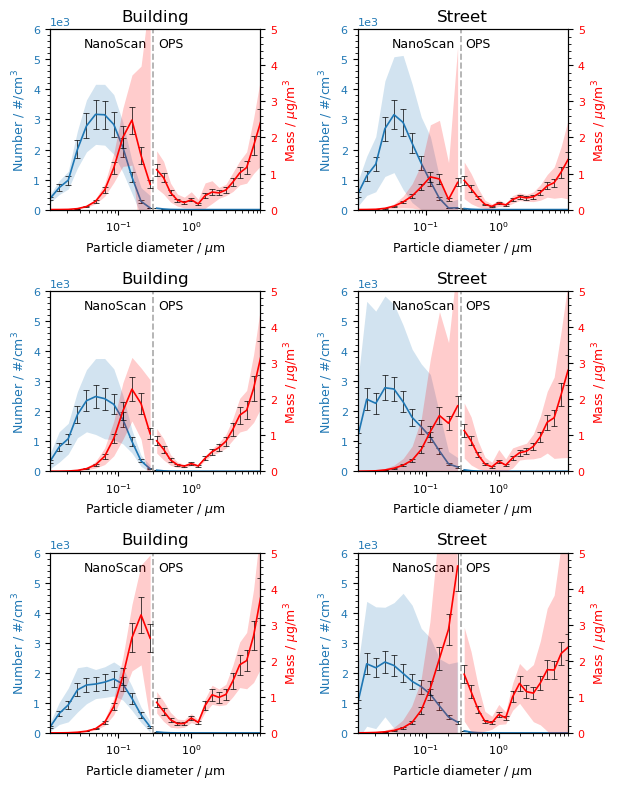

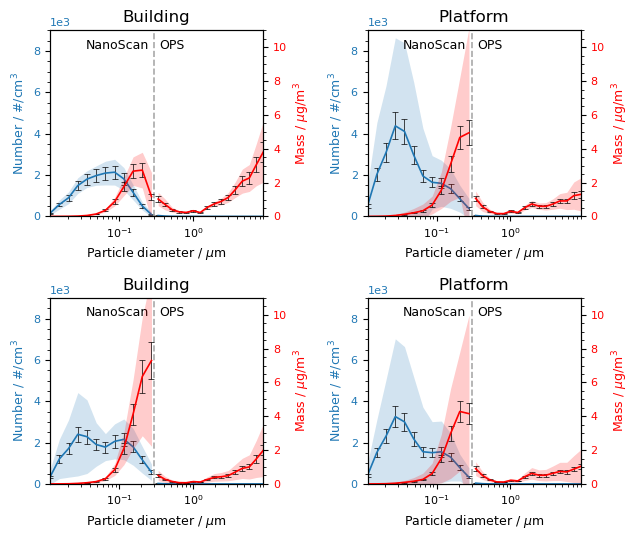

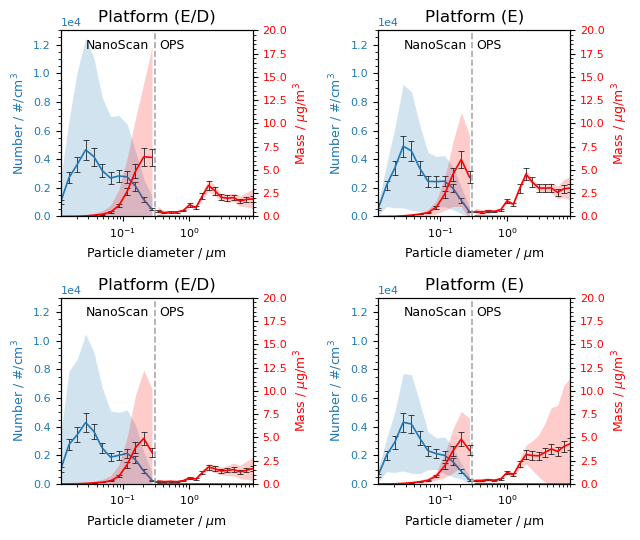

In [16]:
fig1, ax1 = plt.subplots(3, 2, figsize = (6.3, 8))
fig2, ax2 = plt.subplots(2, 2, figsize = (6.5, 5.5))
fig3, ax3 = plt.subplots(2, 2, figsize = (6.5, 5.5))

for i in range(7):
    date = timestamps[i][0].split(' ')[0]
    key = 'Exp' + str(i+1)

    if i < 3:
        y_max = 6*10**3

        n1, en, m1, em, ax_1, ax2_1 = plot_bin_mean(ax1[i][0], timestamps[i], NS_OPS_number1[key], NS_OPS_mass1[key], NS_OPS_keys, 'Time', NS_OPS_bin_mean, ['tab:blue', 'red'], 0.15, ax_labels, True, 0.3)
        n2, en, m2, em, ax_2, ax2_2 = plot_bin_mean(ax1[i][1], timestamps[i], NS_OPS_number2[key], NS_OPS_mass2[key], NS_OPS_keys, 'Time', NS_OPS_bin_mean, ['tab:blue', 'red'], 0.15, ax_labels, True, 0.3)
        print('Day ', i+1)
        print('Number (building): ', np.sum(n1))
        print('Mass (building): ', np.sum(m1))
        print('Mass (building) > 0.3: ', np.sum(m1[12:]))
        print('Number (street): ', np.sum(n2))
        print('Mass (street): ', np.sum(m2))
        print('Mass (street) > 0.3: ', np.sum(m2[12:]))

        ax_1.vlines(0.3, 0, y_max + 10, colors = 'darkgrey', linestyles = '--')
        ax_1.text(0.25, y_max - 0.1*y_max, 'NanoScan', ha = 'right', fontsize = 9)
        ax_1.text(0.35, y_max - 0.1*y_max, 'OPS', ha = 'left', fontsize = 9)
        ax_2.vlines(0.3, 0, y_max + 10, colors = 'darkgrey', linestyles = '--')
        ax_2.text(0.25, y_max - 0.1*y_max, 'NanoScan', ha = 'right', fontsize = 9)
        ax_2.text(0.35, y_max - 0.1*y_max, 'OPS', ha = 'left', fontsize = 9)

        ax_1.set(title = 'Building', ylim = (0, y_max))
        ax_2.set(title = 'Street', ylim = (0, y_max))
        ax2_1.set_ylim(0, 5)
        ax2_2.set_ylim(0, 5)

        fig1.tight_layout()
        fig1.savefig('Mean_concentrations/NS_OPS_mean_CPH_hall.png', dpi = 600)

    if 2 < i < 5:
        y_max = 9*10**3
        n1, en, m1, em, ax_1, ax2_1 = plot_bin_mean(ax2[i-3][0], timestamps[i], NS_OPS_number1[key], NS_OPS_mass1[key], NS_OPS_keys, 'Time', NS_OPS_bin_mean, ['tab:blue', 'red'], 0.15, ax_labels, True, 0.3)
        n2, en, m2, em, ax_2, ax2_2 = plot_bin_mean(ax2[i-3][1], timestamps[i], NS_OPS_number2[key], NS_OPS_mass2[key], NS_OPS_keys, 'Time', NS_OPS_bin_mean, ['tab:blue', 'red'], 0.15, ax_labels, True, 0.3)
        print('Day ', i+1)
        print('Number (building): ', np.sum(n1))
        print('Mass (building): ', np.sum(m1))
        print('Mass (building) > 0.3: ', np.sum(m1[12:]))
        print('Number (platform): ', np.sum(n2))
        print('Mass (platform): ', np.sum(m2))
        print('Mass (platform) > 0.3: ', np.sum(m2[12:]))

        ax_1.vlines(0.3, 0, y_max + 10, colors = 'darkgrey', linestyles = '--')
        ax_1.text(0.25, y_max - 0.1*y_max, 'NanoScan', ha = 'right', fontsize = 9)
        ax_1.text(0.35, y_max - 0.1*y_max, 'OPS', ha = 'left', fontsize = 9)
        ax_2.vlines(0.3, 0, y_max + 10, colors = 'darkgrey', linestyles = '--')
        ax_2.text(0.25, y_max - 0.1*y_max, 'NanoScan', ha = 'right', fontsize = 9)
        ax_2.text(0.35, y_max - 0.1*y_max, 'OPS', ha = 'left', fontsize = 9)

        ax_1.set(title = 'Building', ylim = (0, y_max))
        ax_2.set(title = 'Platform', ylim = (0, y_max))
        ax2_1.set_ylim(0, 11)
        ax2_2.set_ylim(0, 11)

        fig2.tight_layout()
        fig2.savefig('Mean_concentrations/NS_OPS_mean_CPH_platform.png', dpi = 600)

    if i > 4:
        y_max = 1.3*10**4

        n1, en, m1, em, ax_1, ax2_1 = plot_bin_mean(ax3[i-5][0], timestamps[i], NS_OPS_number1[key], NS_OPS_mass1[key], NS_OPS_keys, 'Time', NS_OPS_bin_mean, ['tab:blue', 'red'], 0.15, ax_labels, True, 0.3)
        n2, en, m2, em, ax_2, ax2_2 = plot_bin_mean(ax3[i-5][1], timestamps[i], NS_OPS_number2[key], NS_OPS_mass2[key], NS_OPS_keys, 'Time', NS_OPS_bin_mean, ['tab:blue', 'red'], 0.15, ax_labels, True, 0.3)
        print('Day ', i+1)
        print('Number (Re/IC): ', np.sum(n1))
        print('Mass (Re/IC): ', np.sum(m1))
        print('Mass (Re/IC) > 0.3: ', np.sum(m1[12:]))
        print('Number (S-train): ', np.sum(n2))
        print('Mass (S-train): ', np.sum(m2))
        print('Mass (S-train) > 0.3: ', np.sum(m2[12:]))

        ax_1.vlines(0.3, 0, y_max + 10, colors = 'darkgrey', linestyles = '--')
        ax_1.text(0.25, y_max - 0.1*y_max, 'NanoScan', ha = 'right', fontsize = 9)
        ax_1.text(0.35, y_max - 0.1*y_max, 'OPS', ha = 'left', fontsize = 9)
        ax_2.vlines(0.3, 0, y_max + 10, colors = 'darkgrey', linestyles = '--')
        ax_2.text(0.25, y_max - 0.1*y_max, 'NanoScan', ha = 'right', fontsize = 9)
        ax_2.text(0.35, y_max - 0.1*y_max, 'OPS', ha = 'left', fontsize = 9)

        ax_1.set(title = 'Platform (E/D)', ylim = (0, y_max))
        ax_2.set(title = 'Platform (E)', ylim = (0, y_max))
        ax2_1.set_ylim(0, 20)
        ax2_2.set_ylim(0, 20)

        fig3.tight_layout()
        fig3.savefig('Mean_concentrations/NS_OPS_mean_NP.png', dpi = 600)

c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:295: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:295: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


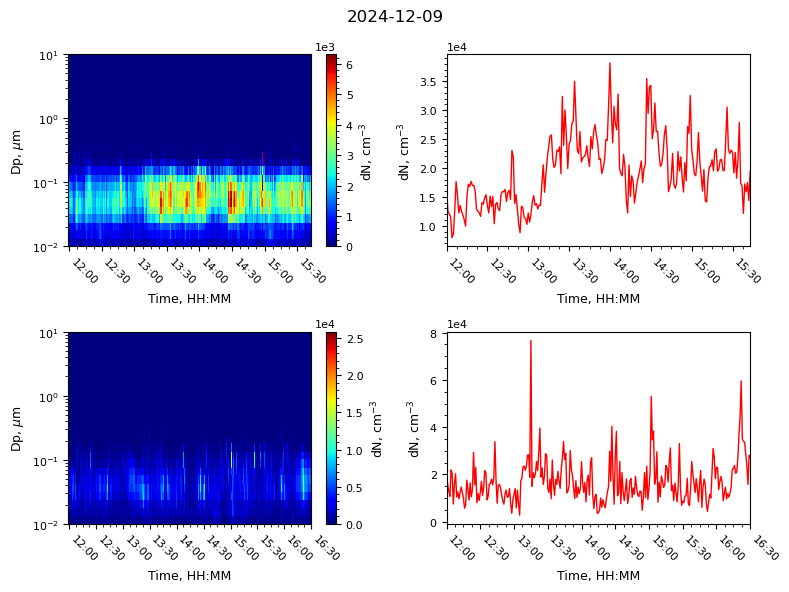

c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:295: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:295: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


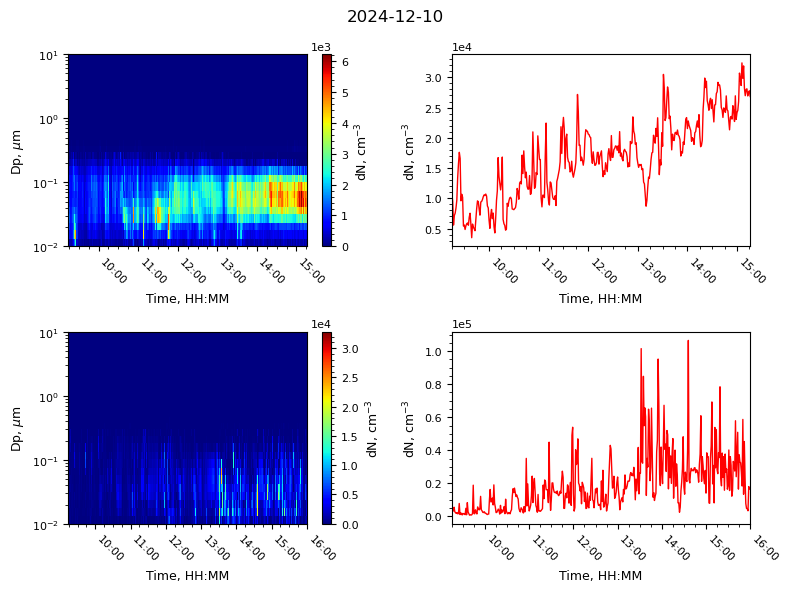

c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:295: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:295: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


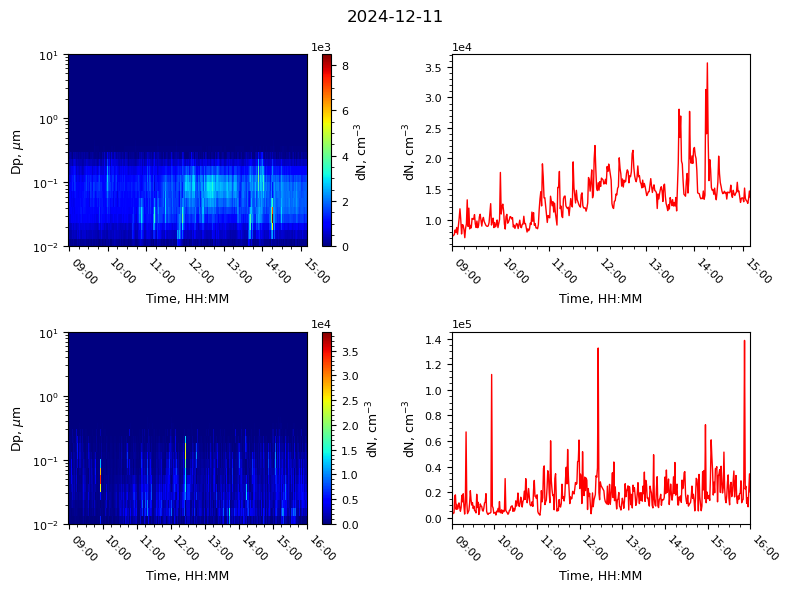

c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:295: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:295: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


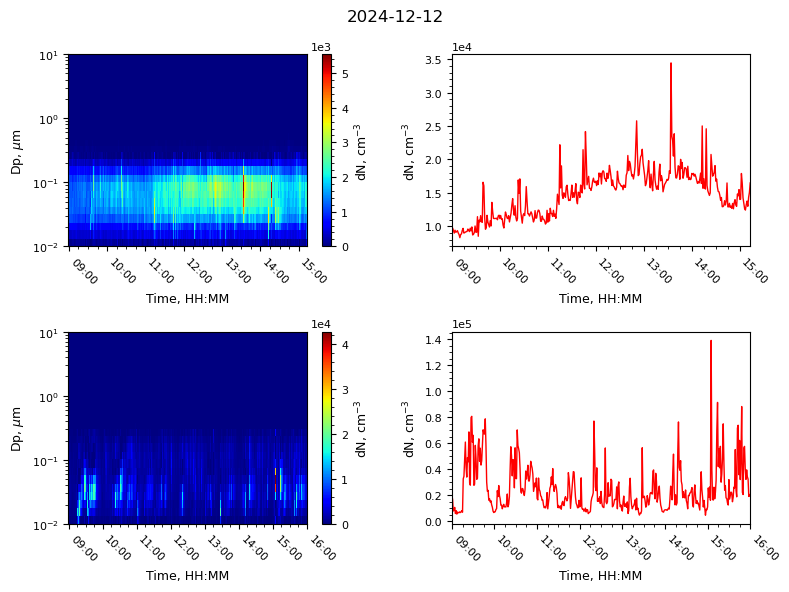

c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:295: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:295: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


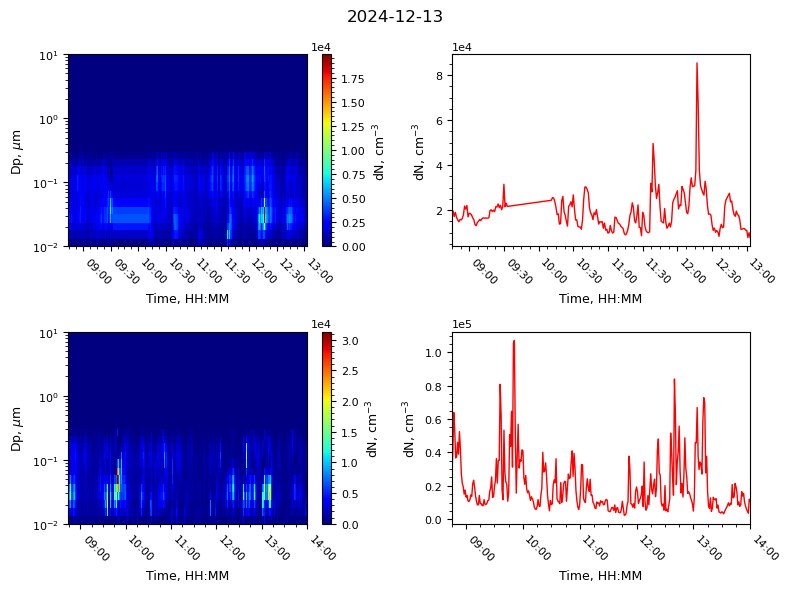

c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:295: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:295: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


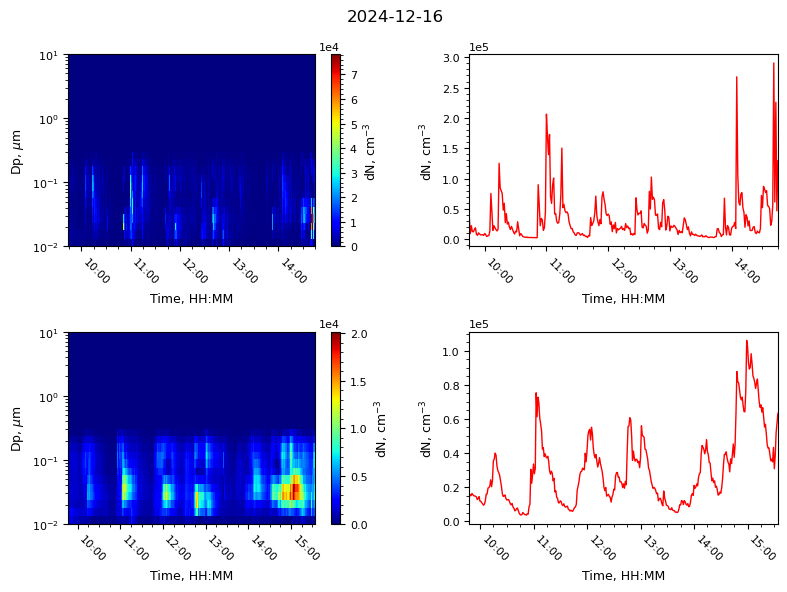

c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:295: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:295: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


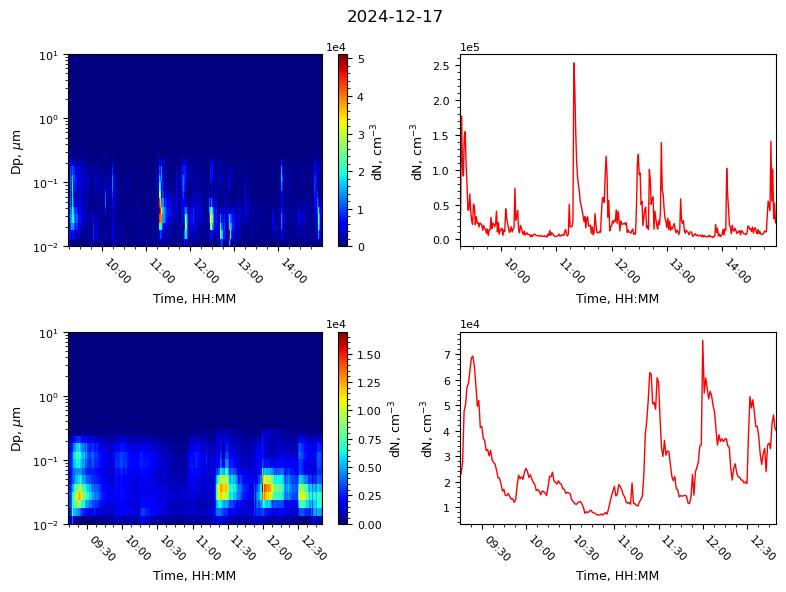

In [6]:
NS_OPS_cut = [0.010, 0.0132, 0.0179, 0.0234, 0.032, 0.0416, 0.057, 0.0739, 0.1015, 0.1314, 0.1805, 0.2337, 
              0.300, 0.374, 0.465, 0.579, 0.721, 0.897, 1.117, 1.391, 1.732, 2.156, 2.685, 3.343, 4.162, 5.182, 6.451, 8.031, 10.000]

for i in range(7):
    date = timestamps[i][0].split(' ')[0]
    key = 'Exp' + str(i+1)

    name = 'Timeseries/NS-OPS_timeseries_number_' +date + '.png'

    fig, ax = plt.subplots(2, 2, figsize = (8, 6))

    plot_timeseries(fig, ax[0], NS_OPS_number1[key], NS_OPS_keys, NS_OPS_cut, 'number', timestamps[i])
    plot_timeseries(fig, ax[1], NS_OPS_number2[key], NS_OPS_keys, NS_OPS_cut, 'number', timestamps[i])

    fig.suptitle(date)

    fig.tight_layout()
    fig.savefig(name, dpi = 600)
    plt.show()

c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:295: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:295: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


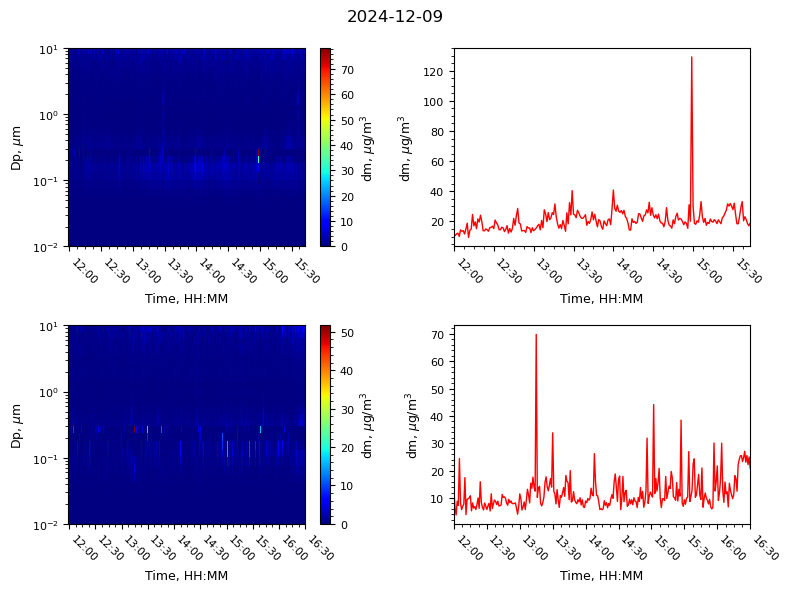

c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:295: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:295: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


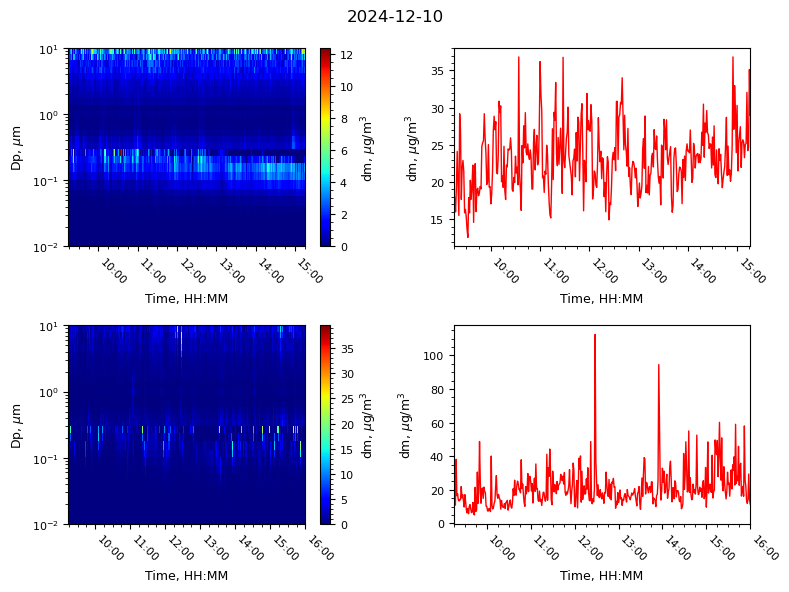

c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:295: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:295: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


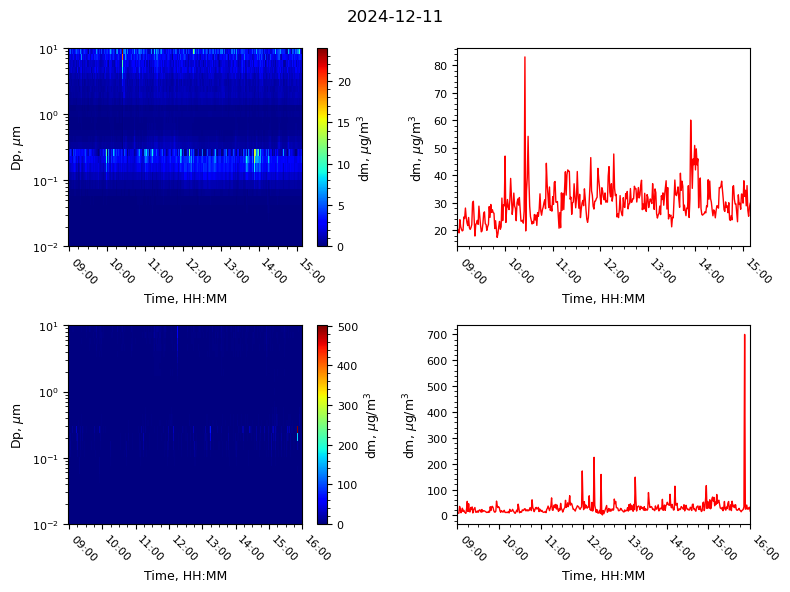

c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:295: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:295: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


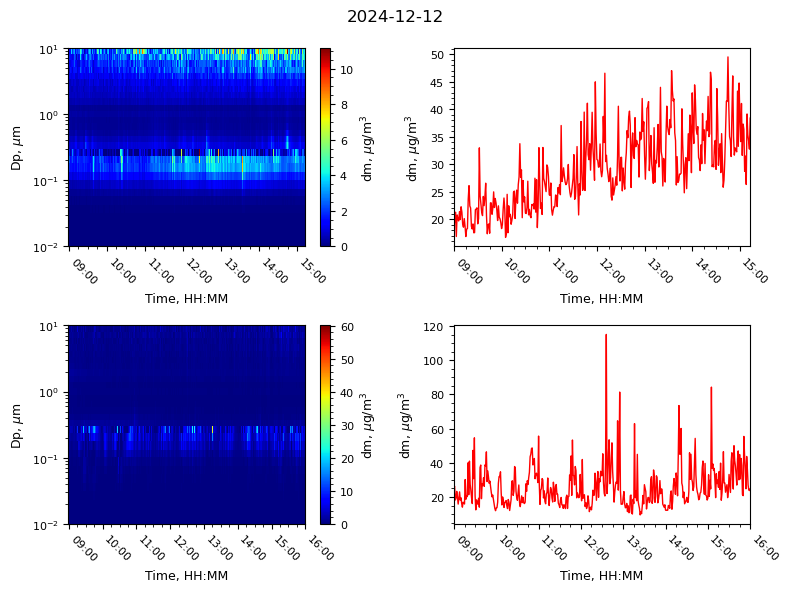

c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:295: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:295: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


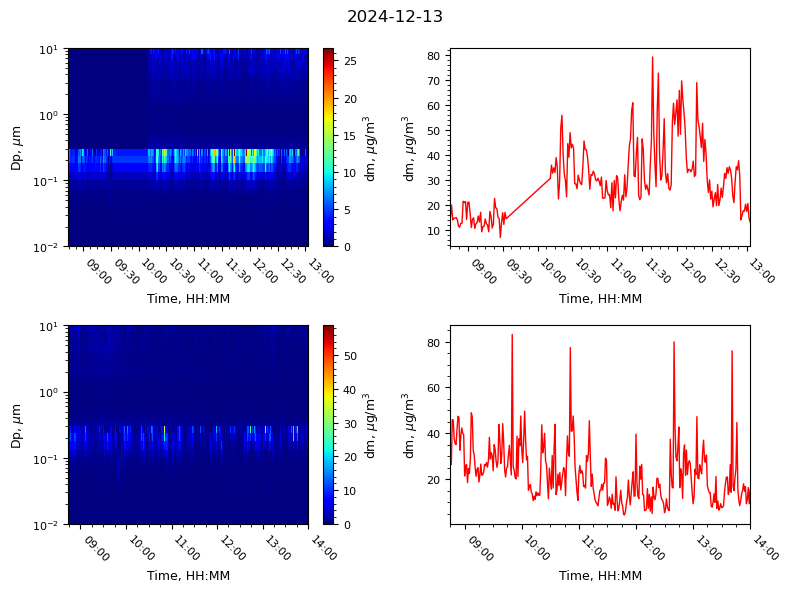

c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:295: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:295: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


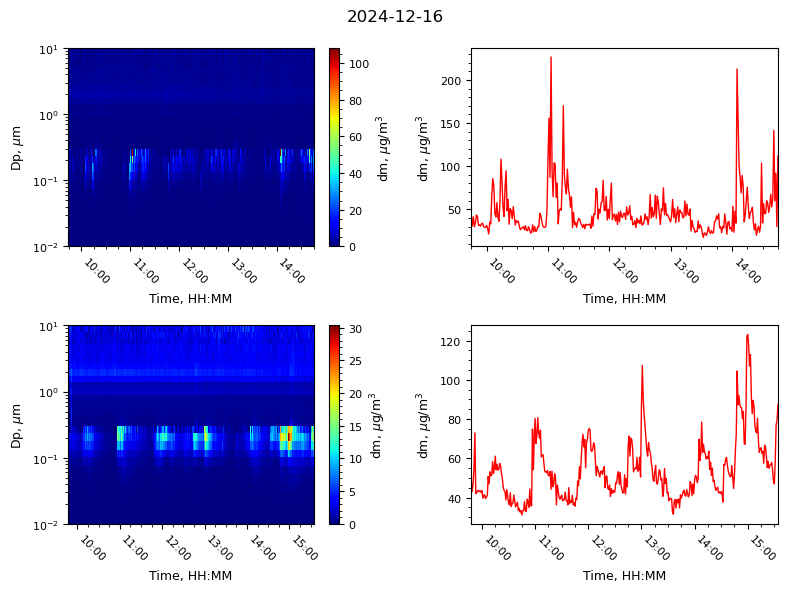

c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:295: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:295: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


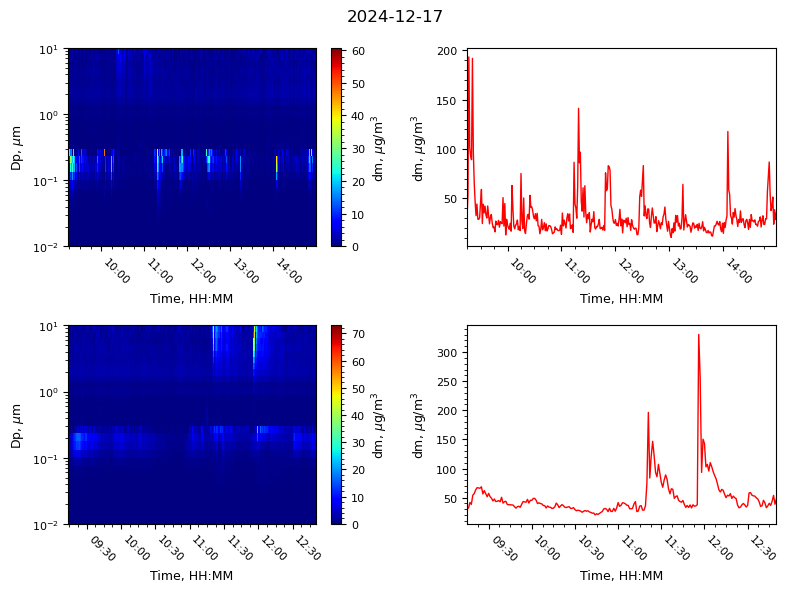

In [7]:
for i in range(7):
    date = timestamps[i][0].split(' ')[0]
    key = 'Exp' + str(i+1)

    name = 'Timeseries/NS-OPS_timeseries_mass_' +date + '.png'

    fig, ax = plt.subplots(2, 2, figsize = (8, 6))

    plot_timeseries(fig, ax[0], NS_OPS_mass1[key], NS_OPS_keys, NS_OPS_cut, 'mass', timestamps[i])
    plot_timeseries(fig, ax[1], NS_OPS_mass2[key], NS_OPS_keys, NS_OPS_cut, 'mass', timestamps[i])

    fig.suptitle(date)

    fig.tight_layout()
    fig.savefig(name, dpi = 600)
    plt.show()